In [1]:
import numpy as np

import os

import tensorflow as tf
from tensorflow.keras.preprocessing import image
import tensorflow.keras.backend as K

from tqdm import tqdm

import matplotlib.pyplot as plt

In [2]:
img_size = (256, 256)


path_img = './imagenet/imagenet/train/'
images_tt = []
files = os.listdir(path_img)
files = files[:10000]
for filename in (pbar := tqdm(files)):
    pbar.set_description(f"Processing {filename}")
    images_tt.append(image.load_img(os.path.join(path_img, filename), target_size=img_size, keep_aspect_ratio=True))
        
    
path_img = './imagenet/imagenet/val/'
images_val = []
files = os.listdir(path_img)
files = files[:1000]
for filename in (pbar := tqdm(files)):
    pbar.set_description(f"Processing {filename}")
    images_val.append(image.load_img(os.path.join(path_img, filename), target_size=img_size, keep_aspect_ratio=True))

Processing ILSVRC2012_val_00001000.JPEG: 100%|█████████████████████████████████████| 1000/1000 [00:17<00:00, 56.39it/s]


In [3]:
%%time
def add_noise_and_convert_to_array (input_img, noise_factor=None, norm=True):
    x_images_clear = []
    x_images_noised = []
    for img in tqdm(input_img):
        if noise_factor == None:
            noise_factor = np.random.uniform(0.1, 0.3)
        img_np = (image.img_to_array(img))
        igm_np = img_np.astype('float32')
        if norm:
            val_upper = 1.
            img_np /= 255.
        else:
            #img_np = img_np.astype('int')
            val_upper = 255.
        x_images_clear.append(img_np)
        noise = noise_factor*val_upper*K.random_normal(img_np.shape, mean=0., stddev=1.0)               
        img_noised = img_np + noise
        img_noised = K.clip(img_noised, 0., val_upper)
        x_images_noised.append(img_noised)
    return np.array(x_images_clear), np.array(x_images_noised)

images_clear_tt, images_noised_tt = add_noise_and_convert_to_array(images_tt, norm=True)
images_clear_val, images_noised_val = add_noise_and_convert_to_array(images_val, norm=True)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.70it/s]


Wall time: 6min 25s


In [4]:
np.save('images_clear_tt', images_clear_tt)
np.save('images_noised_tt', images_noised_tt)
np.save('images_clear_val', images_clear_val)
np.save('images_noised_val', images_noised_val)

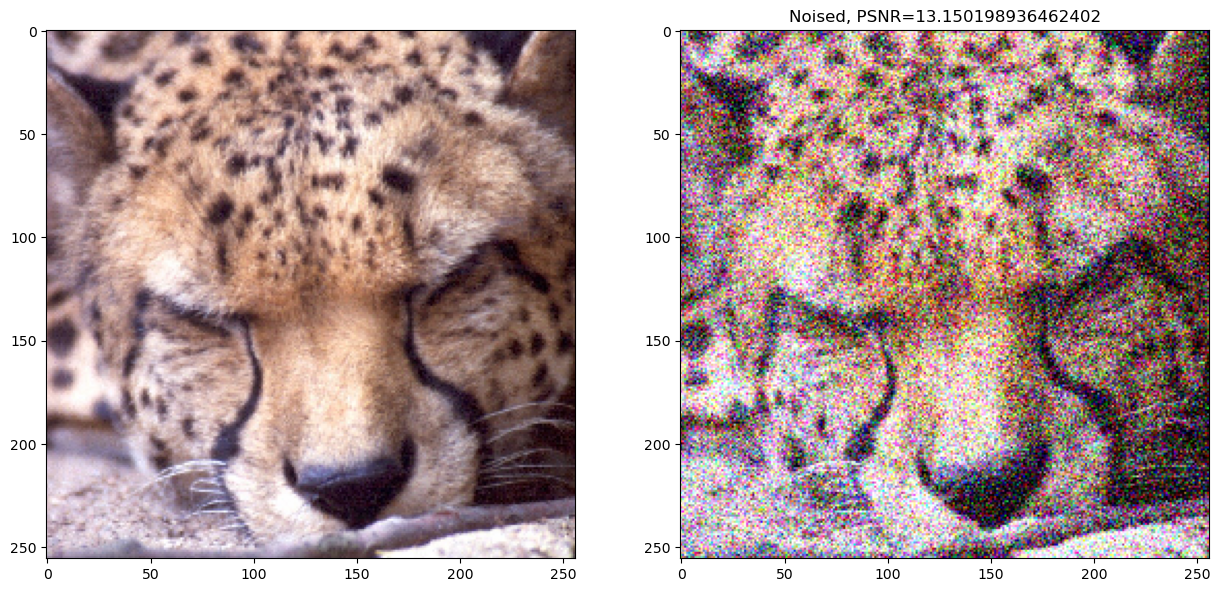

In [5]:
n=5
max_value=1.
plt.subplots(1,2, figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(image.array_to_img(images_clear_tt[n]))
plt.subplot(1,2,2)
plt.title(f'Noised, PSNR={tf.image.psnr(images_clear_tt[n], images_noised_tt[n], max_val=max_value)}')
plt.imshow(image.array_to_img(images_noised_tt[n]))